In [ ]:
import pandas as pd
df=pd.read_csv('/content/2017.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [ ]:
df=df.drop_duplicates()

<Axes: >

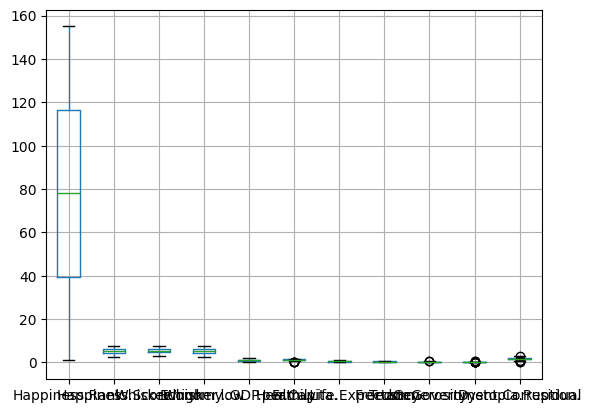

In [ ]:
df.boxplot()

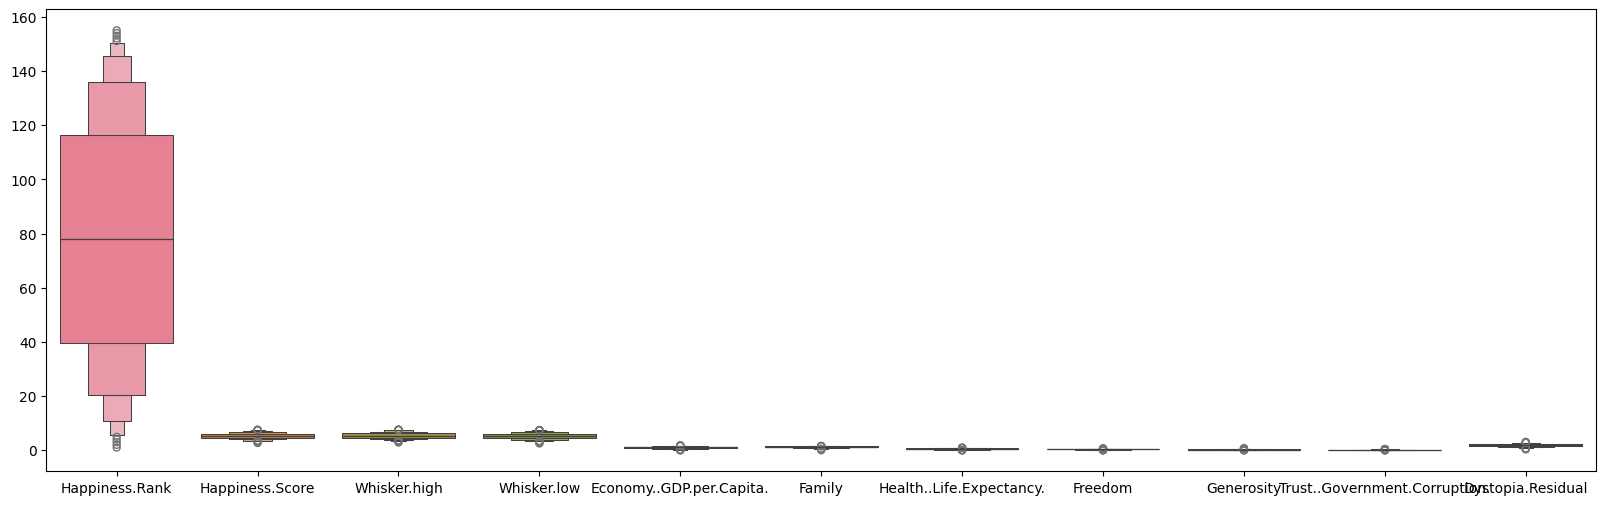

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
sns.boxenplot(data=df)
plt.show()

In [ ]:
import numpy as np
df['Happiness.Rank']=np.log1p(df['Happiness.Rank'])

In [ ]:
Q1=df['Happiness.Rank'].quantile(0.25)
Q3=df['Happiness.Rank'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df=df[(df['Happiness.Rank']>=lower)&(df['Happiness.Rank']<=upper)]

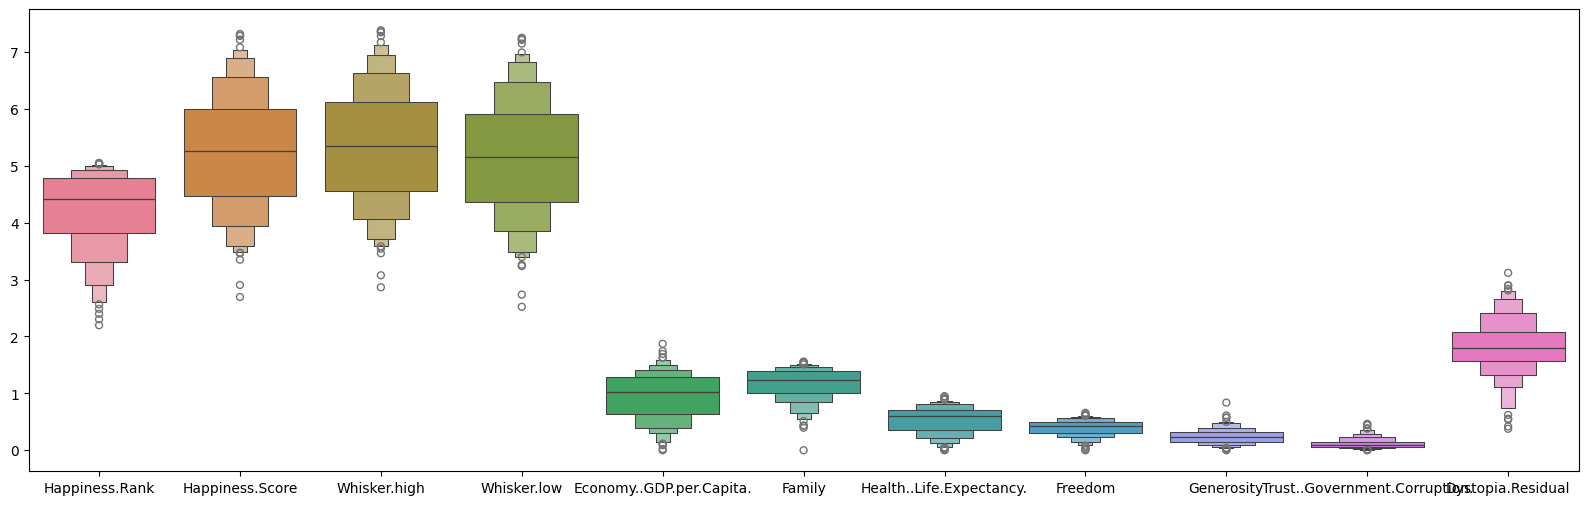

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
sns.boxenplot(data=df)
plt.show()

In [ ]:
df=pd.get_dummies(df,columns=['Country'],drop_first=True).replace({True:1,False:0})

<ipython-input-181-5aee85c9bdae>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=pd.get_dummies(df,columns=['Country'],drop_first=True).replace({True:1,False:0})


In [ ]:
'''from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()
df['Country']=L.fit_transform(df['Country'])'''

"from sklearn.preprocessing import LabelEncoder\nL=LabelEncoder()\ndf['Country']=L.fit_transform(df['Country'])"

In [ ]:
df.head()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,...,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Yemen,Country_Zambia,Country_Zimbabwe
7,2.197225,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,...,0,0,0,0,0,0,0,0,0,0
8,2.302585,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,...,0,0,0,0,0,0,0,0,0,0
9,2.397895,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,...,0,0,0,0,0,0,0,0,0,0
10,2.484907,7.213,7.279853,7.146146,1.375382,1.376290,0.838404,0.405989,0.330083,0.085242,...,0,0,0,0,0,0,0,0,0,0
11,2.564949,7.079,7.168112,6.989888,1.109706,1.416404,0.759509,0.580132,0.214613,0.100107,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.corr()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,...,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Yemen,Country_Zambia,Country_Zimbabwe
Happiness.Rank,1.000000,-0.945466,-0.944954,-0.944886,-0.729069,-0.640586,-0.697158,-0.503138,-0.159365,-0.413554,...,-0.133816,-0.145110,-0.179197,-0.101083,-0.041375,0.023515,0.039515,0.091243,0.064196,0.084612
Happiness.Score,-0.945466,1.000000,0.999409,0.999435,0.798467,0.735202,0.770206,0.513091,0.080048,0.320665,...,0.109017,0.114180,0.136006,0.093841,0.056057,-0.000346,-0.014114,-0.129970,-0.057922,-0.107909
Whisker.high,-0.944954,0.999409,1.000000,0.997689,0.797736,0.732967,0.764073,0.512921,0.080288,0.318497,...,0.108164,0.113046,0.136046,0.094236,0.056253,0.001257,-0.016356,-0.131369,-0.056143,-0.108758
Whisker.low,-0.944886,0.999435,0.997689,1.000000,0.798270,0.736546,0.775323,0.512671,0.079722,0.322418,...,0.109727,0.115158,0.135811,0.093347,0.055801,-0.001913,-0.011905,-0.128453,-0.059594,-0.106956
Economy..GDP.per.Capita.,-0.729069,0.798467,0.797736,0.798270,1.000000,0.666195,0.832594,0.313208,-0.081414,0.277371,...,0.133156,0.096253,0.117156,0.051485,-0.034649,0.033678,-0.034228,-0.073560,-0.064624,-0.116682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Country_Venezuela,0.023515,-0.000346,0.001257,-0.001913,0.033678,0.075216,0.027625,-0.138600,-0.108791,-0.043950,...,-0.006803,-0.006803,-0.006803,-0.006803,-0.006803,1.000000,-0.006803,-0.006803,-0.006803,-0.006803
Country_Vietnam,0.039515,-0.014114,-0.016356,-0.011905,-0.034228,0.030408,0.039954,0.097420,-0.003584,-0.023467,...,-0.006803,-0.006803,-0.006803,-0.006803,-0.006803,-0.006803,1.000000,-0.006803,-0.006803,-0.006803
Country_Yemen,0.091243,-0.129970,-0.131369,-0.128453,-0.073560,-0.069230,-0.080463,-0.084574,-0.084582,-0.050786,...,-0.006803,-0.006803,-0.006803,-0.006803,-0.006803,-0.006803,-0.006803,1.000000,-0.006803,-0.006803
Country_Zambia,0.064196,-0.057922,-0.056143,-0.059594,-0.064624,-0.049482,-0.098853,0.035479,0.005462,-0.031804,...,-0.006803,-0.006803,-0.006803,-0.006803,-0.006803,-0.006803,-0.006803,-0.006803,1.000000,-0.006803


In [ ]:
X=df.drop(columns='Happiness.Score',axis=1)
y=df['Happiness.Score']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
M_scaler=MinMaxScaler()
M_scaler.fit(X_train)
X_test=M_scaler.transform(X_test)
X_train=M_scaler.transform(X_train)

In [ ]:
S_scaler=StandardScaler()
S_scaler.fit(X_train)
X_test=S_scaler.transform(X_test)
X_train=S_scaler.transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
models=[LinearRegression(),RandomForestRegressor(n_estimators=100,max_depth=None,random_state=0),DecisionTreeRegressor(max_depth=None,random_state=0)]

In [ ]:
def my_models():
  for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    print(model)
    print('mse   =',mse)
    print('r2     ',r2)
    print('___________________________________')

In [ ]:
my_models()

LinearRegression()
mse   = 0.033828569546735875
r2      0.9701622096717883
___________________________________
RandomForestRegressor(random_state=0)
mse   = 0.038358219694730904
r2      0.9661669254139273
___________________________________
DecisionTreeRegressor(random_state=0)
mse   = 0.021599021010622863
r2      0.980949030099566
___________________________________
